<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


# Logistic Regression



<div class="span5 alert alert-info">
<p>Logistic regression is a probabilistic model that links observed binary data to a set of features.</p>

<p>Suppose that we have a set of binary (that is, taking the values 0 or 1) observations $Y_1,\cdots,Y_n$, and for each observation $Y_i$ we have a vector of features $X_i$. The logistic regression model assumes that there is some set of **weights**, **coefficients**, or **parameters** $\beta$, one for each feature, so that the data were generated by flipping a weighted coin whose probability of giving a 1 is given by the following equation:

$$
P(Y_i = 1) = \mathrm{logistic}(\sum \beta_i X_i),
$$

where

$$
\mathrm{logistic}(x) = \frac{e^x}{1+e^x}.
$$
</p>
<p>When we *fit* a logistic regression model, we determine values for each $\beta$ that allows the model to best fit the *training data* we have observed. Once we do this, we can use these coefficients to make predictions about data we have not yet observed.</p>

</div>

From http://www.edwardtufte.com/tufte/ebooks, in "Visual and Statistical Thinking: 
Displays of Evidence for Making Decisions":

>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

But they did not make their case persuasively, and were over-ruled by NASA.

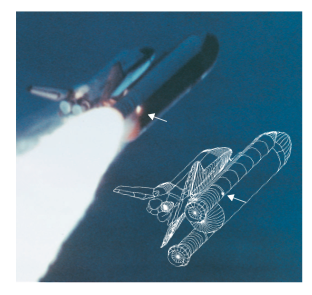

In [30]:
from IPython.display import Image as Im
from IPython.display import display
Im('shuttle.png')

The image above shows the leak, where the O-ring failed.

We have here data on previous failures of the O-rings at various temperatures.

In [3]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("chall.txt")])
data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

Lets plot this data

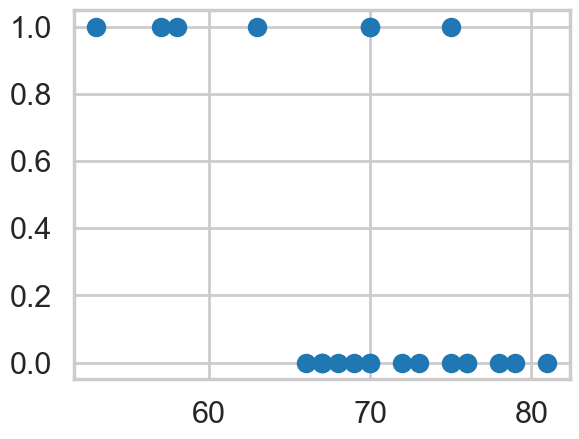

In [4]:
dat = pd.DataFrame(data, columns = ['Temp', 'Failure'])
plt.scatter(dat["Temp"],dat["Failure"])

Do the same thing using Scikit Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model = LogisticRegression()

In [7]:
X = dat["Temp"].values
y = dat["Failure"].values
y

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [8]:
model.fit(X.reshape(-1,1),y)

LogisticRegression()

In [9]:
model.score(X.reshape(-1,1),y)

0.8695652173913043

In [10]:
model.intercept_

array([14.86192709])

In [11]:
model.coef_

array([[-0.22950051]])

In [12]:
x = np.linspace(50, 85, 1000)
y_pred = model.predict(x.reshape(-1,1))

In [13]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

(-0.1, 1.1)

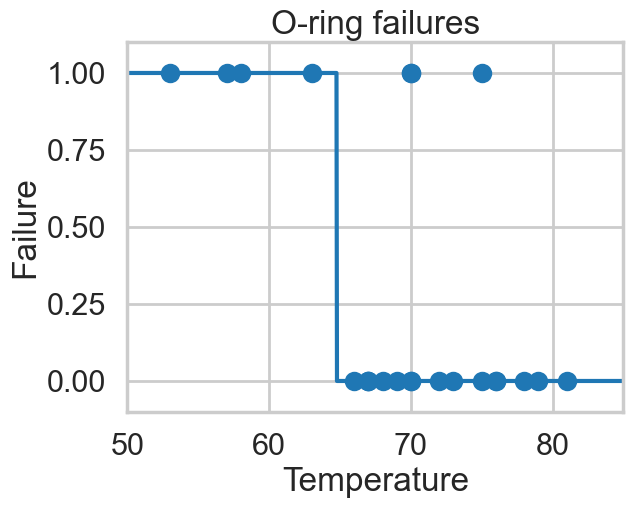

In [14]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_pred)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

#Something very wrong in this picture!

Almost the same!

In [15]:
x

array([50.        , 50.03503504, 50.07007007, 50.10510511, 50.14014014,
       50.17517518, 50.21021021, 50.24524525, 50.28028028, 50.31531532,
       50.35035035, 50.38538539, 50.42042042, 50.45545546, 50.49049049,
       50.52552553, 50.56056056, 50.5955956 , 50.63063063, 50.66566567,
       50.7007007 , 50.73573574, 50.77077077, 50.80580581, 50.84084084,
       50.87587588, 50.91091091, 50.94594595, 50.98098098, 51.01601602,
       51.05105105, 51.08608609, 51.12112112, 51.15615616, 51.19119119,
       51.22622623, 51.26126126, 51.2962963 , 51.33133133, 51.36636637,
       51.4014014 , 51.43643644, 51.47147147, 51.50650651, 51.54154154,
       51.57657658, 51.61161161, 51.64664665, 51.68168168, 51.71671672,
       51.75175175, 51.78678679, 51.82182182, 51.85685686, 51.89189189,
       51.92692693, 51.96196196, 51.996997  , 52.03203203, 52.06706707,
       52.1021021 , 52.13713714, 52.17217217, 52.20720721, 52.24224224,
       52.27727728, 52.31231231, 52.34734735, 52.38238238, 52.41

In [16]:
x = np.linspace(50, 85, 1000)
y_predprob = model.predict_proba(x.reshape(-1,1))
y_predprob

array([[0.03270734, 0.96729266],
       [0.03296269, 0.96703731],
       [0.03321995, 0.96678005],
       ...,
       [0.99033503, 0.00966497],
       [0.99041169, 0.00958831],
       [0.99048774, 0.00951226]])

(-0.1, 1.1)

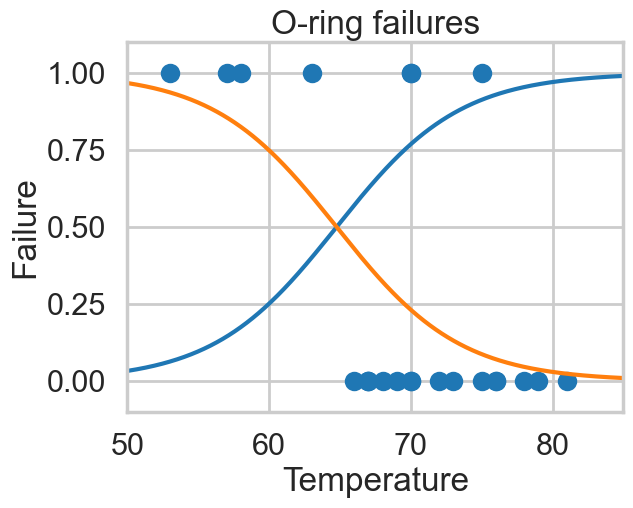

In [17]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

#Something very wrong in this picture!

(-0.1, 1.1)

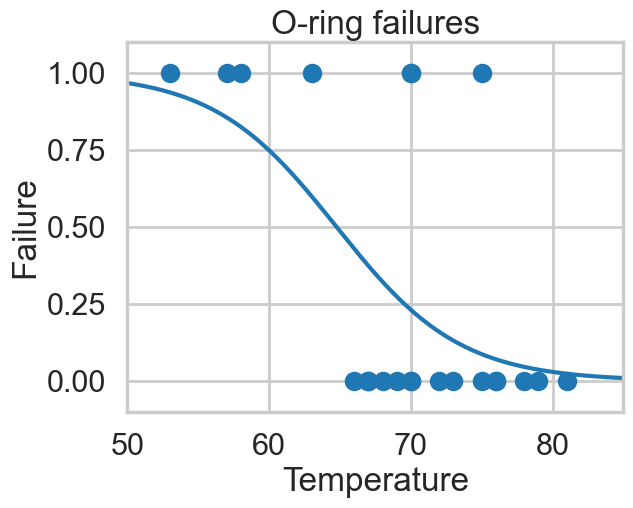

In [18]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob[:,1])

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)


In [19]:
model.predict(np.array([50, 75]).reshape(-1,1))

array([1., 0.])

# Logistic Regression two. Multiple independent variables

Logistic Regression Assumptions

    Binary logistic regression requires the dependent variable to be binary.
    For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
    Only the meaningful variables should be included.
    The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
    The independent variables are linearly related to the log odds.
    Logistic regression requires quite large sample sizes.

We will be using the Titanic dataset from kaggle, which is a collection of data points, including the age, gender, ticket price, etc.., of all the passengers aboard the Titanic. The data set has 891 rows and 12 columns. The goal is to see if we can predict whether any given passenger will die or survive. Hopefully you can see why logistic regression is a fitting model for this problem.

### Task 1
Read in the data as usual and view the first 5 terms, try to understand the contents of each column - think about which columns may be useful and which may not be useful.

In [42]:
df = pd.read_csv("titanic.csv")

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df = df[df["Embarked"].notnull()]

### Task 2
the Columns passengerID, Name and ticket probably are not going to affect a person's chance of survival. Additionally the column cabin has a lot of null values so we won't include that.

The column Age also has Null values, for this column we will just replace them with either the mean or the median

The column survived is going to be our dependent variable, it's either 1 or 0. 

Create the X and y variables that we will be using

In [47]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [48]:
y = df["Survived"]
X = df[["Pclass","Age","Sex","SibSp","Parch","Fare","Embarked"]]

In [49]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,male,1,0,7.2500,S
1,1,38.0,female,1,0,71.2833,C
2,3,26.0,female,0,0,7.9250,S
3,1,35.0,female,1,0,53.1000,S
4,3,35.0,male,0,0,8.0500,S


The sex column is categorical so we need to do some preprocessing to convert it

As long as you have X built correctly the following will encode the data, i.e. make male/female 1 and 0 (or 0 and 1) respectively

In [50]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(X['Sex'])
sex = le_sex.transform(X['Sex'])
X = X.drop(['Sex'], axis = 1)
X['Sex'] = sex
X

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,3,22.0,1,0,7.2500,S,1
1,1,38.0,1,0,71.2833,C,0
2,3,26.0,0,0,7.9250,S,0
3,1,35.0,1,0,53.1000,S,0
4,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,S,1
887,1,19.0,0,0,30.0000,S,0
888,3,28.0,1,2,23.4500,S,0
889,1,26.0,0,0,30.0000,C,1


You need to do the similar thing for the column <b>Embarked</b>

First let's remove the nan entries

In [51]:
X["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

There are 3 options here. LabelEncoder would give a ranking to each of them 0, 1, 2 based on alphabetical order

We probably don't want this. We could use OneHotEncoder() this time to make things better, but for now, just use LabelEncoder

read <a href="https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/">This Article</a> to see more

One-Hot Encoding is the process of creating dummy variables.

![](onehot.png)

In [52]:
X[["Embarked"]].values

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

### Start of onehotencoder

In [66]:
le_embark = preprocessing.OneHotEncoder(sparse_output=False, dtype=int)
le_embark.fit(X[["Embarked"]].values)
embarked = le_embark.transform(X[["Embarked"]].values)

In [67]:
embarked.shape

(889, 3)

In [68]:
embarked

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

3 variables, one for each S, C, Q

Get rid of the original Embarked

In [69]:
X = X.drop(["Embarked"], axis = 1)

Now put in the new columns

There's probably a better way but this will work

In [70]:
X["EmbarkC"] = embarked[:,0]
X["EmbarkQ"] = embarked[:,1]
X["EmbarkS"] = embarked[:,2]

In [71]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex,EmbarkC,EmbarkQ,EmbarkS
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,1
888,3,28.0,1,2,23.4500,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,0


### End of OneHotEncoder

It's not advised to do a LabelEncoder for this type of data, but it might do ok, here's the code if you wanted to do it for simplicity

In [2]:
"""le_embark = preprocessing.LabelEncoder()
le_embark.fit(X["Embarked"])
embarked = le_embark.transform(X["Embarked"])
X = X.drop(["Embarked"], axis = 1)
X["Embarked"] = embarked
X"""

NameError: name 'preprocessing' is not defined

### Task 3
Build the model, firstly using sklearn

In [72]:
titanic_lm = LogisticRegression

In [73]:
titanic_lm = LogisticRegression(max_iter=1000)

In [74]:
titanic_lm.fit(X,y)

LogisticRegression(max_iter=1000)

In [75]:
predictions = titanic_lm.predict(X)

In [76]:
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [77]:
titanic_lm.score(X,y)

0.8008998875140607

You should get a score of 80% accurate in predicting whether someone survives or not

However, this is on the training set, we really should use a different set to score our model, one that it has not seen before

Make sure you keep your titanic_lm model, do not overwrite it in the next task

Age, Pclass and Sex have very low p-values (I've hidden how I found this out here), suggesting that they are variables that really influenced whether somebody survived.

Which is what we expected from what we know about the titanic, People in 1st class got out, women and children on the boats first.

In [78]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

## Cross Validation

LogisticRegression does have a hyperparameter, the amount of Regularisation. This is controlled by the C variable, let's use cross validation to pick our C

In [79]:
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 2, 4, 10, 100, 1000, 10000]

Using cross_val_score:

In [80]:
from sklearn.model_selection import cross_val_score

In [86]:
avg_val_scores = []  # Empty Dictionary
for i in Cs:
    model = LogisticRegression(C=i, max_iter=1000)
    score = cross_val_score(model, X, y)
    avg_val_scores.append(score.mean())

In [88]:
avg_val_scores

[0.6636894559766393,
 0.6816860280581476,
 0.7289468672633784,
 0.7908271440360566,
 0.788567257030407,
 0.788567257030407,
 0.786320066019171,
 0.7851901225163461,
 0.7851901225163461,
 0.7851901225163461,
 0.7851901225163461]

In [89]:
max(avg_val_scores)

0.7908271440360566

In [91]:
np.argmax(avg_val_scores)

3

In [93]:
Cs[3]

0.1

So C=0.1 is the "best" hyperparameter to use according to this procedure

In [147]:
titanic_lm = LogisticRegression(C=0.1, max_iter=1000)
titanic_lm.fit(X,y)
titanic_lm.score(X,y)

0.8065241844769404

You may get different numbers due to the possibilities of randomness

Using k-fold:

In [95]:
from sklearn.model_selection import KFold

In [100]:
X.values

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [108]:
n_folds = 5
fold = 0
kf = KFold(n_splits=n_folds, shuffle=True)
train_scores = np.zeros((len(Cs),n_folds))
valid_scores = np.zeros((len(Cs),n_folds))
for train_index, val_index in kf.split(X.values):
    # We split the training set up based on the index found in kf.split, this allows us to get all the results for one fold
    X_c, X_val = X.values[train_index], X.values[val_index]
    y_c, y_val = y.values[train_index], y.values[val_index]
    count = 0
    for i in Cs:
        est = LogisticRegression(C=i, max_iter=1000)
        est.fit(X_c, y_c)
        train_scores[count, fold] = est.score(X_c, y_c)
        valid_scores[count, fold] = est.score(X_val, y_val) # evaluate score function on held-out data
        count += 1
    fold += 1

In [109]:
valid_scores

array([[0.59550562, 0.65168539, 0.65168539, 0.65730337, 0.72881356],
       [0.62921348, 0.66853933, 0.67977528, 0.68539326, 0.75141243],
       [0.6741573 , 0.69101124, 0.74719101, 0.73033708, 0.8079096 ],
       [0.73595506, 0.79213483, 0.83146067, 0.7752809 , 0.87570621],
       [0.75280899, 0.79213483, 0.8258427 , 0.75280899, 0.86440678],
       [0.74719101, 0.79213483, 0.8258427 , 0.75280899, 0.86440678],
       [0.75280899, 0.78651685, 0.8258427 , 0.75280899, 0.86440678],
       [0.75280899, 0.79213483, 0.8258427 , 0.74719101, 0.86440678],
       [0.75280899, 0.78651685, 0.8258427 , 0.74719101, 0.86440678],
       [0.75280899, 0.78651685, 0.8258427 , 0.74719101, 0.86440678],
       [0.75280899, 0.78651685, 0.8258427 , 0.74719101, 0.86440678]])

In [114]:
mean_train_scores = train_scores.mean(axis=1)
mean_valid_scores = valid_scores.mean(axis=1)

In [116]:
mean_valid_scores

array([0.65699867, 0.68286676, 0.73012125, 0.80210754, 0.79760046,
       0.79647686, 0.79647686, 0.79647686, 0.79535327, 0.79535327,
       0.79535327])

In [115]:
bestC = np.argmax(mean_valid_scores)
bestC

3

In [117]:
Cs[bestC]

0.1

In [118]:
mean_valid_scores[bestC]

0.8021075350726846

By using Validation we have made a decision that the LogisticRegression with C=0.1 is the best model we can make, it has the above validation score

For proper evaluation of the model we should now use a Test Set that we know the answer to, but the below is a Test set we do not know the answer to

## You should notice

That I used the highest score to make my decision. Sometimes we would be better to use the lowest error but it is easier to just use .score

### Task 5 
Let's use the model to make predictions with new information

I hope you still have the sklearn model!

Read in the titanic_test.csv file and view the first 5 as usual

In [148]:
df_test = pd.read_csv("titanic_test.csv")

In [149]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


You need to do the same things you did to the previous one, replace the NaNs in age and make X_test by extracting off the same columns. Notice there is no survived column so we don't know the right answer

In [150]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

In [151]:
X_test = df_test[["Pclass","Age","Sex","SibSp","Parch","Fare","Embarked"]]

In [152]:
X_test.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,34.5,male,0,0,7.8292,Q
1,3,47.0,female,1,0,7.0000,S
2,2,62.0,male,0,0,9.6875,Q
3,3,27.0,male,0,0,8.6625,S
4,3,22.0,female,1,1,12.2875,S


Encode sex and Embarked the same as before

Reuse the le_sex and le_embark that you already made as this will ensure the same number goes with the same character. I'll use the sex column as an example and you do Embarked

In [153]:
sex_test = le_sex.transform(X_test['Sex'])
X_test = X_test.drop(['Sex'], axis = 1)
X_test['Sex'] = sex_test
X_test

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,3,34.5,0,0,7.8292,Q,1
1,3,47.0,1,0,7.0000,S,0
2,2,62.0,0,0,9.6875,Q,1
3,3,27.0,0,0,8.6625,S,1
4,3,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...
412,3,27.0,0,0,8.0500,S,1
413,1,39.0,0,0,108.9000,C,0
414,3,38.5,0,0,7.2500,S,1
415,3,27.0,0,0,8.0500,S,1


In [154]:
##Alter the Embarked column
embark_test = le_embark.transform(X_test[['Embarked']].values)
X_test = X_test.drop(['Embarked'], axis = 1)
X_test["EmbarkC"] = embark_test[:,0]
X_test["EmbarkQ"] = embark_test[:,1]
X_test["EmbarkS"] = embark_test[:,2]


In [155]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   417 non-null    int64  
 1   Age      417 non-null    float64
 2   SibSp    417 non-null    int64  
 3   Parch    417 non-null    int64  
 4   Fare     417 non-null    float64
 5   Sex      417 non-null    int32  
 6   EmbarkC  417 non-null    int32  
 7   EmbarkQ  417 non-null    int32  
 8   EmbarkS  417 non-null    int32  
dtypes: float64(2), int32(4), int64(3)
memory usage: 22.9 KB


In [156]:
y_predicted = titanic_lm.predict(X_test)

In [157]:
y_predprob = titanic_lm.predict_proba(X_test)

In [158]:
df_test['survive_predicted'] = y_predicted

y_predprob has 2 values, probability of not surviving and probability of surviving. We just want one of those so slice it off and put it into our original dataframe

In [159]:
df_test['survive_probability'] = y_predprob[:,1]

In [160]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survive_predicted,survive_probability
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.144688
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.310950
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.136917
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.137172
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.511424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,0,0.136922
413,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.896703
414,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.096803
415,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,0,0.136922


We can see what our model predicts for the new data, additionally we've added in the probabilities for more information